# Section 1: Introduction

In this section, we want to answer the following questions:
- How has the number of opioid-related deaths in California changed from 2015 to 2021?
- Which counties have the highest growth rate in terms of death rates per 100K residents?
- Which counties have the most number of deaths? Which counties have the highest death rates per 100K residents?
- How does it look on the California map?

In [182]:
# Import libraries
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# increase the size and quality of any plots we produce
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 200

In [186]:
# Load data
opioid_df = pd.read_csv("data/Opioid_Deaths_by_County_2015-2020.csv")
opioid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   County  360 non-null    object 
 1   Rates   354 non-null    float64
 2   Counts  360 non-null    float64
 3   Year    360 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 11.4+ KB


In [187]:
# Fill null values in Rates column. They are most likely counties with no death counts and zero rate. Let's replace them with zeros
opioid_df = opioid_df.fillna(0)
opioid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   County  360 non-null    object 
 1   Rates   360 non-null    float64
 2   Counts  360 non-null    float64
 3   Year    360 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 11.4+ KB


In [189]:
# Check the statistical distributions of the data
opioid_df.describe()

,Rates,Counts,Year
count,360.000000,360.000000,360.000000
mean,7.731583,96.661111,2017.500000
std,6.663298,414.086963,1.710202
min,0.000000,0.000000,2015.000000
25%,3.307500,3.000000,2016.000000
50%,6.215000,14.000000,2017.500000
75%,10.052500,46.000000,2019.000000
max,44.510000,5502.000000,2020.000000


In [200]:
# Check county column
print(opioid_df["County"].unique())

['Alameda' 'Alpine' 'Amador' 'Butte' 'Calaveras' 'California' 'Colusa'
 'Contra Costa' 'Del Norte' 'El Dorado' 'Fresno' 'Glenn' 'Humboldt'
 'Imperial' 'Inyo' 'Kern' 'Kings' 'Lake' 'Lassen' 'Los Angeles' 'Madera'
 'Marin' 'Mariposa' 'Mendocino' 'Merced' 'Modoc' 'Mono' 'Monterey' 'Napa'
 'Nevada' 'Orange' 'Placer' 'Plumas' 'Riverside' 'Sacramento' 'San Benito'
 'San Bernardino' 'San Diego' 'San Francisco' 'San Joaquin'
 'San Luis Obispo' 'San Mateo' 'Santa Barbara' 'Santa Clara' 'Santa Cruz'
 'Shasta' 'Sierra' 'Siskiyou' 'Solano' 'Sonoma' 'Stanislaus' 'Sutter'
 'Tehama' 'Trinity' 'Tulare' 'Tuolumne' 'Unknown' 'Ventura' 'Yolo' 'Yuba']


We see that there is "California" in the County column. This must be the sum of all counties' numbers. We take it out of the county dataframe and conduct separate analysis for California as a whole.

In [202]:
# Take out California
cali_opioid = opioid_df[opioid_df["County"] == "California"]
cali_opioid.head()

,County,Rates,Counts,Year
5,California,4.79,1992.0,2015
65,California,4.87,2039.0,2016
125,California,5.22,2194.0,2017
185,California,5.82,2428.0,2018
245,California,7.90,3244.0,2019


In [205]:
# Remove California from county data
county_opioid = opioid_df[opioid_df["County"] != "California"]
print(county_opioid["County"].unique())

['Alameda' 'Alpine' 'Amador' 'Butte' 'Calaveras' 'Colusa' 'Contra Costa'
 'Del Norte' 'El Dorado' 'Fresno' 'Glenn' 'Humboldt' 'Imperial' 'Inyo'
 'Kern' 'Kings' 'Lake' 'Lassen' 'Los Angeles' 'Madera' 'Marin' 'Mariposa'
 'Mendocino' 'Merced' 'Modoc' 'Mono' 'Monterey' 'Napa' 'Nevada' 'Orange'
 'Placer' 'Plumas' 'Riverside' 'Sacramento' 'San Benito' 'San Bernardino'
 'San Diego' 'San Francisco' 'San Joaquin' 'San Luis Obispo' 'San Mateo'
 'Santa Barbara' 'Santa Clara' 'Santa Cruz' 'Shasta' 'Sierra' 'Siskiyou'
 'Solano' 'Sonoma' 'Stanislaus' 'Sutter' 'Tehama' 'Trinity' 'Tulare'
 'Tuolumne' 'Unknown' 'Ventura' 'Yolo' 'Yuba']


### Death Rates and Counts in California from 2015 - 2021

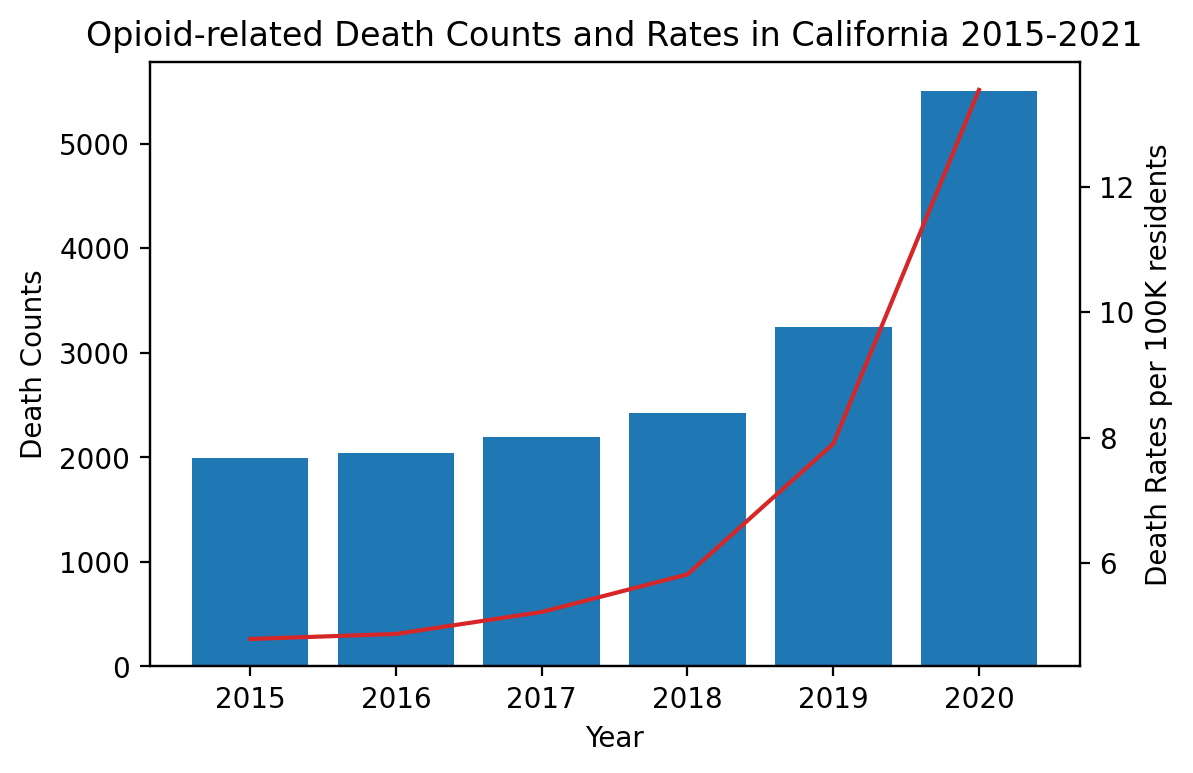

In [212]:
# Plot California death counts and rates 2015 - 2021
fig,ax1 = plt.subplots()
x = cali_opioid["Year"]
y1 = cali_opioid["Counts"]
y2 = cali_opioid["Rates"]

color = 'tab:blue'
ax1.set_xlabel("Year")
ax1.set_ylabel("Death Counts")
ax1.set_title("Opioid-related Death Counts and Rates in California 2015-2021")
ax1.bar(x,y1,color=color)

color = 'tab:red'
ax2 = ax1.twinx()
ax2.set_ylabel("Death Rates per 100K residents")
ax2.plot(x,y2,color=color)

plt.show()

Takeaway: Both death counts and rates have been significantly increasing since 2015. In 2019 and 2020, death rates almost doubled every year.

### Death Rates and Counts in different counties

California is a big state. One way to dig deeper into this trend is to look at the numbers geographically (by county). Next, we will explore how opioid-related deaths and counts change in different counties in CA.

In [265]:
# Calculate the growth in death rates 2018 - 2019 and 2019 - 2020
year_2018 = county_opioid[county_opioid["Year"] == 2018]
year_2019 = county_opioid[county_opioid["Year"] == 2019]
year_2020 = county_opioid[county_opioid["Year"] == 2020]

growthrates = pd.merge(year_2018,year_2019,on="County",suffixes=(2018,2019))
county_opioid_rates = pd.merge(growthrates,year_2020,on="County")
county_opioid_rates.head()

,County,Rates2018,Counts2018,Year2018,Rates2019,Counts2019,Year2019,Rates,Counts,Year
0,Alameda,3.10,56.0,2018,5.75,103.0,2019,8.09,144.0,2020
1,Alpine,0.00,0.0,2018,0.00,0.0,2019,0.00,0.0,2020
2,Amador,2.90,1.0,2018,7.81,5.0,2019,13.07,4.0,2020
3,Butte,6.55,17.0,2018,5.83,12.0,2019,11.54,26.0,2020
4,Calaveras,9.71,3.0,2018,7.79,4.0,2019,7.00,2.0,2020


In [266]:
# Remove and rename columns
county_opioid_rates = county_opioid_rates.drop(columns=["Year2018","Year2019","Year"])
county_opioid_rates = county_opioid_rates.rename(columns={"Rates":"Rates2020","Counts":"Counts2020"})
county_opioid_rates.head()

,County,Rates2018,Counts2018,Rates2019,Counts2019,Rates2020,Counts2020
0,Alameda,3.10,56.0,5.75,103.0,8.09,144.0
1,Alpine,0.00,0.0,0.00,0.0,0.00,0.0
2,Amador,2.90,1.0,7.81,5.0,13.07,4.0
3,Butte,6.55,17.0,5.83,12.0,11.54,26.0
4,Calaveras,9.71,3.0,7.79,4.0,7.00,2.0


In [267]:
county_opioid_rates["Counts_Growth_2019"] = (county_opioid_rates["Counts2019"] - county_opioid_rates["Counts2018"])/county_opioid_rates["Counts2018"]*100
county_opioid_rates["Counts_Growth_2020"] = (county_opioid_rates["Counts2020"] - county_opioid_rates["Counts2019"])/county_opioid_rates["Counts2019"]*100
county_opioid_rates["Rates_Growth_2019"] = (county_opioid_rates["Rates2019"] - county_opioid_rates["Rates2018"])/county_opioid_rates["Rates2018"]*100
county_opioid_rates["Rates_Growth_2020"] = (county_opioid_rates["Rates2020"] - county_opioid_rates["Rates2019"])/county_opioid_rates["Rates2019"]*100

county_opioid_rates.head()

,County,Rates2018,Counts2018,Rates2019,Counts2019,Rates2020,Counts2020,Counts_Growth_2019,Counts_Growth_2020,Rates_Growth_2019,Rates_Growth_2020
0,Alameda,3.10,56.0,5.75,103.0,8.09,144.0,83.928571,39.805825,85.483871,40.695652
1,Alpine,0.00,0.0,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN
2,Amador,2.90,1.0,7.81,5.0,13.07,4.0,400.000000,-20.000000,169.310345,67.349552
3,Butte,6.55,17.0,5.83,12.0,11.54,26.0,-29.411765,116.666667,-10.992366,97.941681
4,Calaveras,9.71,3.0,7.79,4.0,7.00,2.0,33.333333,-50.000000,-19.773429,-10.141207


In [268]:
# Fill in null values
county_opioid_rates = county_opioid_rates.fillna(0)

In [269]:
# Which counties have the highest growth in the opioid-related death counts?
county_opioid_rates.sort_values(by="Counts_Growth_2020",ascending=False)

,County,Rates2018,Counts2018,Rates2019,Counts2019,Rates2020,Counts2020,Counts_Growth_2019,Counts_Growth_2020,Rates_Growth_2019,Rates_Growth_2020
55,Unknown,0.00,77.0,0.00,4.0,0.00,113.0,-94.805195,2725.000000,0.000000,0.000000
15,Kings,2.76,4.0,1.06,2.0,7.36,10.0,-50.000000,400.000000,-61.594203,594.339623
50,Sutter,8.72,8.0,2.50,3.0,10.35,11.0,-62.500000,266.666667,-71.330275,314.000000
46,Siskiyou,3.62,2.0,5.98,2.0,19.37,7.0,0.000000,250.000000,65.193370,223.913043
53,Tulare,1.73,7.0,2.52,12.0,8.22,39.0,71.428571,225.000000,45.664740,226.190476
28,Nevada,6.28,7.0,10.45,10.0,34.09,30.0,42.857143,200.000000,66.401274,226.220096
7,Del Norte,0.00,0.0,4.67,1.0,9.01,3.0,inf,200.000000,inf,92.933619
10,Glenn,4.71,1.0,3.31,1.0,14.87,3.0,0.000000,200.000000,-29.723992,349.244713
39,San Luis Obispo,4.29,13.0,8.12,21.0,20.56,57.0,61.538462,171.428571,89.277389,153.201970
12,Imperial,10.07,16.0,7.02,12.0,19.07,32.0,-25.000000,166.666667,-30.287984,171.652422


In [270]:
# Which counties have the highest growth in the opioid-related death rates?
county_opioid_rates.sort_values(by="Rates_Growth_2020",ascending=False)

,County,Rates2018,Counts2018,Rates2019,Counts2019,Rates2020,Counts2020,Counts_Growth_2019,Counts_Growth_2020,Rates_Growth_2019,Rates_Growth_2020
15,Kings,2.76,4.0,1.06,2.0,7.36,10.0,-50.000000,400.000000,-61.594203,594.339623
10,Glenn,4.71,1.0,3.31,1.0,14.87,3.0,0.000000,200.000000,-29.723992,349.244713
50,Sutter,8.72,8.0,2.50,3.0,10.35,11.0,-62.500000,266.666667,-71.330275,314.000000
51,Tehama,3.52,2.0,1.02,1.0,3.38,2.0,-50.000000,100.000000,-71.022727,231.372549
28,Nevada,6.28,7.0,10.45,10.0,34.09,30.0,42.857143,200.000000,66.401274,226.220096
53,Tulare,1.73,7.0,2.52,12.0,8.22,39.0,71.428571,225.000000,45.664740,226.190476
46,Siskiyou,3.62,2.0,5.98,2.0,19.37,7.0,0.000000,250.000000,65.193370,223.913043
12,Imperial,10.07,16.0,7.02,12.0,19.07,32.0,-25.000000,166.666667,-30.287984,171.652422
39,San Luis Obispo,4.29,13.0,8.12,21.0,20.56,57.0,61.538462,171.428571,89.277389,153.201970
27,Napa,3.97,7.0,2.29,3.0,5.20,8.0,-57.142857,166.666667,-42.317380,127.074236


In [275]:
# Which counties have the highest death rates per 100K residents in 2020
county_opioid_rates.sort_values(by="Rates2020",ascending=False)

,County,Rates2018,Counts2018,Rates2019,Counts2019,Rates2020,Counts2020,Counts_Growth_2019,Counts_Growth_2020,Rates_Growth_2019,Rates_Growth_2020
37,San Francisco,15.01,147.0,26.96,279.0,44.51,443.0,89.795918,58.781362,79.613591,65.096439
28,Nevada,6.28,7.0,10.45,10.0,34.09,30.0,42.857143,200.000000,66.401274,226.220096
16,Lake,22.70,21.0,32.46,23.0,26.11,17.0,9.523810,-26.086957,42.995595,-19.562539
22,Mendocino,13.70,14.0,21.12,18.0,25.84,20.0,28.571429,11.111111,54.160584,22.348485
14,Kern,10.46,92.0,12.79,117.0,24.32,222.0,27.173913,89.743590,22.275335,90.148554
48,Sonoma,9.23,43.0,13.09,65.0,23.69,111.0,51.162791,70.769231,41.820152,80.977846
13,Inyo,17.77,3.0,14.47,2.0,22.03,3.0,-33.333333,50.000000,-18.570625,52.246026
39,San Luis Obispo,4.29,13.0,8.12,21.0,20.56,57.0,61.538462,171.428571,89.277389,153.201970
46,Siskiyou,3.62,2.0,5.98,2.0,19.37,7.0,0.000000,250.000000,65.193370,223.913043
12,Imperial,10.07,16.0,7.02,12.0,19.07,32.0,-25.000000,166.666667,-30.287984,171.652422


### Summary

- In California, both opioid-related death counts and rates have been increasing since 2015. Both death counts and death rates almost doubled from 2019 to 2020, which might indicate the impact of COVID-19 into these numbers.
- Counties with the highest growth in number of deaths and death rates in 2020 are: Kings, Glenn, Nevada, Siskiyou, Sutter. Notice that the growth rates of these counties from 2018 to 2019 are zero or negative, while they are high in 2020. One possible hypothesis is that the pandemic caused people with opioid addiction to move from bigger counties like Los Angeles, San Francisco, San Bernado to smaller counties, and affected the numbers in those counties.
- San Francisco, Nevada, Lake, Kern, Sonoma counties had the highest death rates per 100K residents.

## Section 2: Relationship between opioid-related deaths vs. healthcare facility and hospital beds distribution in California by county

In this section, we want to answer the following questions:

- Where are the medical facilities with emergency care located in California? How are they distributed?
- How are hospital beds distributed among different counties in California?
- Are there any relationships between opioid-related deaths and facility and hospital beds distribution?

In [27]:
# Load data set
df = pd.read_csv("data/current-healthcare-facility-listing_cleaned.csv")
df.head()

,OSHPD_ID,FACILITY_NAME,LICENSE_NUM,FACILITY_LEVEL_DESC,DBA_ADDRESS1,DBA_CITY,DBA_ZIP_CODE,COUNTY_CODE,COUNTY_NAME,ER_SERVICE_LEVEL_DESC,TOTAL_NUMBER_BEDS,FACILITY_STATUS_DESC,FACILITY_STATUS_DATE,LICENSE_TYPE_DESC,LICENSE_CATEGORY_DESC,LATITUDE,LONGITUDE
0,106010735,ALAMEDA HOSPITAL,140000002,Parent Facility,2070 Clinton Ave,Alameda,94501,1,Alameda,Emergency - Basic,101,Open,1946-01-01,Hospital,General Acute Care Hospital,37.76266,-122.253991
1,106010739,ALTA BATES SUMMIT MEDICAL CENTER-ALTA BATES CA...,140000004,Parent Facility,2450 Ashby Ave,Berkeley,94705,1,Alameda,Emergency - Basic,339,Open,1946-01-02,Hospital,General Acute Care Hospital,37.85645,-122.257430
2,106010776,UCSF BENIOFF CHILDREN'S HOSPITAL OAKLAND,140000015,Parent Facility,747 52ND ST,OAKLAND,94609,1,Alameda,Emergency - Basic,215,Open,1946-01-01,Hospital,General Acute Care Hospital,37.83722,-122.267470
3,106010811,FAIRMONT HOSPITAL,140000046,Consolidated Facility,15400 Foothill Blvd,San Leandro,94578,1,Alameda,None,109,Open,1953-07-01,Hospital,General Acute Care Hospital,37.70648,-122.118190
4,106010844,ALTA BATES SUMMIT MEDICAL CENTER-HERRICK CAMPUS,140000004,Consolidated Facility,2001 DWIGHT WAY,BERKELEY,94704,1,Alameda,None,68,Open,1946-01-01,Hospital,General Acute Care Hospital,37.86373,-122.269840


Below is the data dictionary for this dataframe.

- OSHPD_ID: ID of the facility
- FACILITY_NAME: Name of the facility
- LICENSE_NUM: License Number of the facility
- FACILITY_LEVEL_DESC: Level of the facility
- DBA_ADDRESS1: Street Address
- DBA_CITY: City where facility is located
- DBA_ZIP_CODE: Zip code of the facility
- COUNTY_CODE: County code where facility is located
- COUNTY_NAME: Name of County
- ER_SERVICE_LEVEL_DESC: Level of emergency service that facility provides
- TOTAL_NUMBER_BEDS: Number of beds in the facility
- FACILITY_STATUS_DESC: Operating status of the facility
- FACILITY_STATUS_DATE: Date of the status update
- LICENSE_TYPE_DESC: Type of license
- LICENSE_CATEGORY_DESC: Category of license
- LATITUDE: Latitude of facility location
- LONGITUDE: Longitude of facility location

There are a lot of columns which we might not need in our analysis. Let's try to understand each column and drop unnecessary ones.

In [28]:
# Drop LICENSE_NUM, FACILITY_LEVEL, and COUNTY_CODE
df = df.drop(columns = ['LICENSE_NUM','FACILITY_LEVEL_DESC','COUNTY_CODE'])

In [5]:
# Check ER_SERVICE_LEVEL_DESC column
df['ER_SERVICE_LEVEL_DESC'].value_counts()

Not Applicable               7901
Emergency - Basic             293
None                          113
Emergency - Standby            30
Emergency - Comprehensive      11
Name: ER_SERVICE_LEVEL_DESC, dtype: int64

Unfortunately, most of the healthcare facilities in California either don't have ER services, or don't have the data related to ER services.

In [6]:
# Replace None with Not Applicable for consistency
df['ER_SERVICE_LEVEL_DESC'] = df['ER_SERVICE_LEVEL_DESC'].replace('None','Not Applicable')
df['ER_SERVICE_LEVEL_DESC'].value_counts()

Not Applicable               8014
Emergency - Basic             293
Emergency - Standby            30
Emergency - Comprehensive      11
Name: ER_SERVICE_LEVEL_DESC, dtype: int64

In [7]:
# Check License type column
df['LICENSE_TYPE_DESC'].value_counts()

Home Health Agency/Hospice    4338
Clinic                        2105
Long Term Care Facility       1378
Hospital                       527
Name: LICENSE_TYPE_DESC, dtype: int64

In [19]:
# Check License Category column
df['LICENSE_CATEGORY_DESC'].value_counts()

Home Health Agency                   2571
Hospice                              1767
Community Clinic                     1332
Skilled Nursing Facility             1098
Chronic Dialysis Clinic               652
General Acute Care Hospital           447
Congregate Living Health Facility     256
Free Clinic                            46
Acute Psychiatric Hospital             39
Psychiatric Health Facility            34
Surgical Clinic                        32
Psychology Clinic                      19
Hospice Facility                       14
Rehabilitation Clinic                  12
Alternative Birthing Center            12
ICF/Dev. Disabled                      10
Chemical Dep. Recovery Hospital         7
Name: LICENSE_CATEGORY_DESC, dtype: int64

### Explore Emergency Care facilities

In [8]:
# Subset the dataframe to choose facilities with ER service only
df_emergency = df[df['ER_SERVICE_LEVEL_DESC'] != 'Not Applicable']
df_emergency.head()

,OSHPD_ID,FACILITY_NAME,DBA_ADDRESS1,DBA_CITY,DBA_ZIP_CODE,COUNTY_NAME,ER_SERVICE_LEVEL_DESC,TOTAL_NUMBER_BEDS,FACILITY_STATUS_DESC,FACILITY_STATUS_DATE,LICENSE_TYPE_DESC,LICENSE_CATEGORY_DESC,LATITUDE,LONGITUDE
0,106010735,ALAMEDA HOSPITAL,2070 Clinton Ave,Alameda,94501,Alameda,Emergency - Basic,101,Open,1946-01-01,Hospital,General Acute Care Hospital,37.76266,-122.253991
1,106010739,ALTA BATES SUMMIT MEDICAL CENTER-ALTA BATES CA...,2450 Ashby Ave,Berkeley,94705,Alameda,Emergency - Basic,339,Open,1946-01-02,Hospital,General Acute Care Hospital,37.85645,-122.257430
2,106010776,UCSF BENIOFF CHILDREN'S HOSPITAL OAKLAND,747 52ND ST,OAKLAND,94609,Alameda,Emergency - Basic,215,Open,1946-01-01,Hospital,General Acute Care Hospital,37.83722,-122.267470
5,106010846,HIGHLAND HOSPITAL,1411 E 31st St,Oakland,94602,Alameda,Emergency - Basic,249,Open,1953-07-01,Hospital,General Acute Care Hospital,37.79925,-122.231380
7,106010937,ALTA BATES SUMMIT MEDICAL CENTER,350 HAWTHORNE AVE,OAKLAND,94609,Alameda,Emergency - Basic,403,Open,1946-01-01,Hospital,General Acute Care Hospital,37.82106,-122.262570


In [9]:
df_emergency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 509
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OSHPD_ID               334 non-null    int64  
 1   FACILITY_NAME          334 non-null    object 
 2   DBA_ADDRESS1           334 non-null    object 
 3   DBA_CITY               334 non-null    object 
 4   DBA_ZIP_CODE           334 non-null    int64  
 5   COUNTY_NAME            334 non-null    object 
 6   ER_SERVICE_LEVEL_DESC  334 non-null    object 
 7   TOTAL_NUMBER_BEDS      334 non-null    object 
 8   FACILITY_STATUS_DESC   334 non-null    object 
 9   FACILITY_STATUS_DATE   334 non-null    object 
 10  LICENSE_TYPE_DESC      334 non-null    object 
 11  LICENSE_CATEGORY_DESC  334 non-null    object 
 12  LATITUDE               334 non-null    float64
 13  LONGITUDE              334 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 39.1+ KB

In [10]:
# Check facility status
df_emergency['FACILITY_STATUS_DESC'].value_counts()

Open        333
Suspense      1
Name: FACILITY_STATUS_DESC, dtype: int64

In [11]:
# Which facility was suspended? Maybe we could drop it
df_emergency[df_emergency['FACILITY_STATUS_DESC'] == 'Suspense']

,OSHPD_ID,FACILITY_NAME,DBA_ADDRESS1,DBA_CITY,DBA_ZIP_CODE,COUNTY_NAME,ER_SERVICE_LEVEL_DESC,TOTAL_NUMBER_BEDS,FACILITY_STATUS_DESC,FACILITY_STATUS_DATE,LICENSE_TYPE_DESC,LICENSE_CATEGORY_DESC,LATITUDE,LONGITUDE
150,106190534,OLYMPIA MEDICAL CENTER,5900 W Olympic Blvd,Los Angeles,90036,Los Angeles,Emergency - Basic,204,Suspense,2021-04-01,Hospital,General Acute Care Hospital,34.05754,-118.36008


In [12]:
# Choose dataframe with status 'Open' only
df_emergency = df_emergency[df_emergency['FACILITY_STATUS_DESC'] == 'Open']

In [14]:
# Clean up this data
df_emergency['COUNTY_NAME'] = df_emergency['COUNTY_NAME'].astype('category')
df_emergency['TOTAL_NUMBER_BEDS'] = df_emergency['TOTAL_NUMBER_BEDS'].astype('int64')

#### Where are the medical facilities with emergency care located in California? 

In [15]:
# Count number of emergency facility by county
emergency_county = df_emergency.groupby('COUNTY_NAME')['OSHPD_ID'].count().reset_index().sort_values(by = 'OSHPD_ID', ascending = False)
emergency_county = emergency_county.rename(columns = {"OSHPD_ID":"COUNT_FAC"})

In [73]:
emergency_county.head()

,COUNTY_NAME,COUNT_FAC
17,Los Angeles,72
28,Orange,26
34,San Bernardino,19
35,San Diego,18
31,Riverside,17


In [74]:
# What about number of hospital beds by county?
beds_by_county = df_emergency.groupby('COUNTY_NAME')['TOTAL_NUMBER_BEDS'].sum().reset_index().sort_values(by = 'TOTAL_NUMBER_BEDS', ascending = False)
beds_by_county.head()

,COUNTY_NAME,TOTAL_NUMBER_BEDS
17,Los Angeles,20947
35,San Diego,6260
28,Orange,5968
34,San Bernardino,4079
31,Riverside,3512


In [99]:
# Merge these 2 tables by County name
df_by_county = emergency_county.set_index('COUNTY_NAME').join(beds_by_county.set_index('COUNTY_NAME'))
df_by_county.head()

,COUNT_FAC,TOTAL_NUMBER_BEDS
COUNTY_NAME,,
Los Angeles,72,20947
Orange,26,5968
San Bernardino,19,4079
San Diego,18,6260
Riverside,17,3512


In [100]:
df_by_county = df_by_county.reset_index()
df_by_county["COUNTY_NAME"] = df_by_county["COUNTY_NAME"].str.strip()
df_by_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   COUNTY_NAME        55 non-null     object
 1   COUNT_FAC          55 non-null     int64 
 2   TOTAL_NUMBER_BEDS  55 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ KB


### Add population by county data
Until this point, we've only looked at absolute number of ER facilities and hospital beds. In order to compare these number among counties, we need to add population data.

In [118]:
# load dataframe
pop_df = pd.read_csv("data/population_by_county_cleaned2021.csv")
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  58 non-null     int64  
 1   CTYNAME     58 non-null     object 
 2   pop2021     58 non-null     int64  
 3   GrowthRate  58 non-null     float64
 4   popDensity  58 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.4+ KB


In [119]:
# Prepare to join
pop_df = pop_df.drop(columns= ["Unnamed: 0","GrowthRate","popDensity"])
pop_df["pop2021"] = pop_df["pop2021"].astype(int)
pop_df["CTYNAME"] = pop_df["CTYNAME"].str.strip()
pop_df= pop_df.set_index("CTYNAME")

In [120]:
# Merge with df_by_county
df_by_county_merged = df_by_county.set_index("COUNTY_NAME").join(pop_df)
df_by_county_merged

,COUNT_FAC,TOTAL_NUMBER_BEDS,pop2021
COUNTY_NAME,,,
Los Angeles,72,20947,9969510
Orange,26,5968,3175130
San Bernardino,19,4079,2206750
San Diego,18,6260,3347270
Riverside,17,3512,2520060
Alameda,13,2894,1680480
Santa Clara,11,3492,1918880
Kern,10,1514,913090
San Francisco,10,2757,883255


In [121]:
# Calculate ER facility and hospital bed rate per 100K residents
df_by_county_merged["FAC_DENSITY"] = df_by_county_merged["COUNT_FAC"]/df_by_county_merged["pop2021"]*100000
df_by_county_merged["BEDS_DENSITY"] = df_by_county_merged["TOTAL_NUMBER_BEDS"]/df_by_county_merged["pop2021"]*100000
df_by_county_merged.describe()

,COUNT_FAC,TOTAL_NUMBER_BEDS,pop2021,FAC_DENSITY,BEDS_DENSITY
count,55.000000,55.000000,5.500000e+01,55.000000,55.000000
mean,6.054545,1335.363636,7.183827e+05,2.626415,199.556524
std,10.479995,3047.480577,1.494140e+06,3.886172,153.900501
min,1.000000,17.000000,8.923000e+03,0.506752,53.973531
25%,1.500000,77.000000,5.959200e+04,0.839929,138.731147
50%,3.000000,351.000000,1.970370e+05,1.166616,172.212701
75%,7.000000,1288.000000,7.719095e+05,2.726685,204.447627
max,72.000000,20947.000000,9.969510e+06,22.413986,1176.734282


In [148]:
df_by_county_merged.sort_values(by=["BEDS_DENSITY"],ascending=False)

,COUNTY_NAME,COUNT_FAC,TOTAL_NUMBER_BEDS,pop2021,FAC_DENSITY,BEDS_DENSITY
36,Modoc,2,105,8923,22.413986,1176.734282
22,Plumas,3,78,18939,15.840329,411.848566
45,Trinity,1,48,11721,8.531695,409.521372
33,Inyo,2,62,18225,10.973937,340.192044
27,Shasta,3,607,180822,1.659090,335.689241
8,San Francisco,10,2757,883255,1.132176,312.140888
38,Madera,2,464,158217,1.264087,293.268106
54,Yuba,1,221,80890,1.236247,273.210533
35,Napa,2,351,135654,1.474339,258.746517
24,Butte,3,467,196880,1.523771,237.200325


## Time to merge with opioid-related death data

By merging these 2 data sets, we can answer these following questions:
- How are death counts and death rates distributed visually on a California map?
- Are there any correlation between the distribution of ER facility or distribution of hospital beds, and opioid-related deaths?


In [307]:
# Merge with opioid-related deaths data
county_sum = df_by_county_merged.merge(county_opioid_rates,left_on="COUNTY_NAME",right_on="County")
county_sum

,COUNTY_NAME,COUNT_FAC,TOTAL_NUMBER_BEDS,pop2021,FAC_DENSITY,BEDS_DENSITY,County,Rates2018,Counts2018,Rates2019,Counts2019,Rates2020,Counts2020,Counts_Growth_2019,Counts_Growth_2020,Rates_Growth_2019,Rates_Growth_2020
0,Los Angeles,72,20947,9969510,0.722202,210.110627,Los Angeles,4.57,497.0,6.70,707.0,12.40,1300.0,42.253521,83.875530,46.608315,85.074627
1,Orange,26,5968,3175130,0.818864,187.960808,Orange,7.46,252.0,8.13,272.0,15.45,503.0,7.936508,84.926471,8.981233,90.036900
2,San Bernardino,19,4079,2206750,0.860995,184.841962,San Bernardino,4.77,106.0,6.10,133.0,12.95,288.0,25.471698,116.541353,27.882600,112.295082
3,San Diego,18,6260,3347270,0.537752,187.018077,San Diego,7.39,268.0,8.92,314.0,15.14,528.0,17.164179,68.152866,20.703654,69.730942
4,Riverside,17,3512,2520060,0.674587,139.361761,Riverside,5.74,144.0,9.77,245.0,16.05,400.0,70.138889,63.265306,70.209059,64.278403
5,Alameda,13,2894,1680480,0.773588,172.212701,Alameda,3.10,56.0,5.75,103.0,8.09,144.0,83.928571,39.805825,85.483871,40.695652
6,Santa Clara,11,3492,1918880,0.573251,181.981156,Santa Clara,2.83,60.0,4.12,88.0,7.10,143.0,46.666667,62.500000,45.583039,72.330097
7,Kern,10,1514,913090,1.095182,165.810599,Kern,10.46,92.0,12.79,117.0,24.32,222.0,27.173913,89.743590,22.275335,90.148554
8,San Francisco,10,2757,883255,1.132176,312.140888,San Francisco,15.01,147.0,26.96,279.0,44.51,443.0,89.795918,58.781362,79.613591,65.096439
9,Sacramento,8,2935,1578680,0.506752,185.914815,Sacramento,4.65,70.0,7.39,119.0,6.81,107.0,70.000000,-10.084034,58.924731,-7.848444


In [308]:
# Clean the merged dataset: remove unnecessary columns and rename columns
county_sum = county_sum.drop(columns=["pop2021","County","Rates2018","Counts2018"])
to_renamed = {
    "Rates2019":"RATES19",
    "Counts2019":"COUNTS19",
    "Rates2020":"RATES20",
    "Counts2020":"COUNTS20",
    "Counts_Growth_2019":"COUNTS_GR19",
    "Counts_Growth_2020":"COUNTS_GR20",
    "Rates_Growth_2019":"RATES_GR19",
    "Rates_Growth_2020":"RATES_GR20"}
county_sum = county_sum.rename(columns=to_renamed)

county_sum.head()

,COUNTY_NAME,COUNT_FAC,TOTAL_NUMBER_BEDS,FAC_DENSITY,BEDS_DENSITY,RATES19,COUNTS19,RATES20,COUNTS20,COUNTS_GR19,COUNTS_GR20,RATES_GR19,RATES_GR20
0,Los Angeles,72,20947,0.722202,210.110627,6.70,707.0,12.40,1300.0,42.253521,83.875530,46.608315,85.074627
1,Orange,26,5968,0.818864,187.960808,8.13,272.0,15.45,503.0,7.936508,84.926471,8.981233,90.036900
2,San Bernardino,19,4079,0.860995,184.841962,6.10,133.0,12.95,288.0,25.471698,116.541353,27.882600,112.295082
3,San Diego,18,6260,0.537752,187.018077,8.92,314.0,15.14,528.0,17.164179,68.152866,20.703654,69.730942
4,Riverside,17,3512,0.674587,139.361761,9.77,245.0,16.05,400.0,70.138889,63.265306,70.209059,64.278403


In [309]:
county_sum.replace([np.inf, -np.inf], np.nan, inplace=True)
county_sum.fillna(0)

,COUNTY_NAME,COUNT_FAC,TOTAL_NUMBER_BEDS,FAC_DENSITY,BEDS_DENSITY,RATES19,COUNTS19,RATES20,COUNTS20,COUNTS_GR19,COUNTS_GR20,RATES_GR19,RATES_GR20
0,Los Angeles,72,20947,0.722202,210.110627,6.70,707.0,12.40,1300.0,42.253521,83.875530,46.608315,85.074627
1,Orange,26,5968,0.818864,187.960808,8.13,272.0,15.45,503.0,7.936508,84.926471,8.981233,90.036900
2,San Bernardino,19,4079,0.860995,184.841962,6.10,133.0,12.95,288.0,25.471698,116.541353,27.882600,112.295082
3,San Diego,18,6260,0.537752,187.018077,8.92,314.0,15.14,528.0,17.164179,68.152866,20.703654,69.730942
4,Riverside,17,3512,0.674587,139.361761,9.77,245.0,16.05,400.0,70.138889,63.265306,70.209059,64.278403
5,Alameda,13,2894,0.773588,172.212701,5.75,103.0,8.09,144.0,83.928571,39.805825,85.483871,40.695652
6,Santa Clara,11,3492,0.573251,181.981156,4.12,88.0,7.10,143.0,46.666667,62.500000,45.583039,72.330097
7,Kern,10,1514,1.095182,165.810599,12.79,117.0,24.32,222.0,27.173913,89.743590,22.275335,90.148554
8,San Francisco,10,2757,1.132176,312.140888,26.96,279.0,44.51,443.0,89.795918,58.781362,79.613591,65.096439
9,Sacramento,8,2935,0.506752,185.914815,7.39,119.0,6.81,107.0,70.000000,-10.084034,58.924731,-7.848444


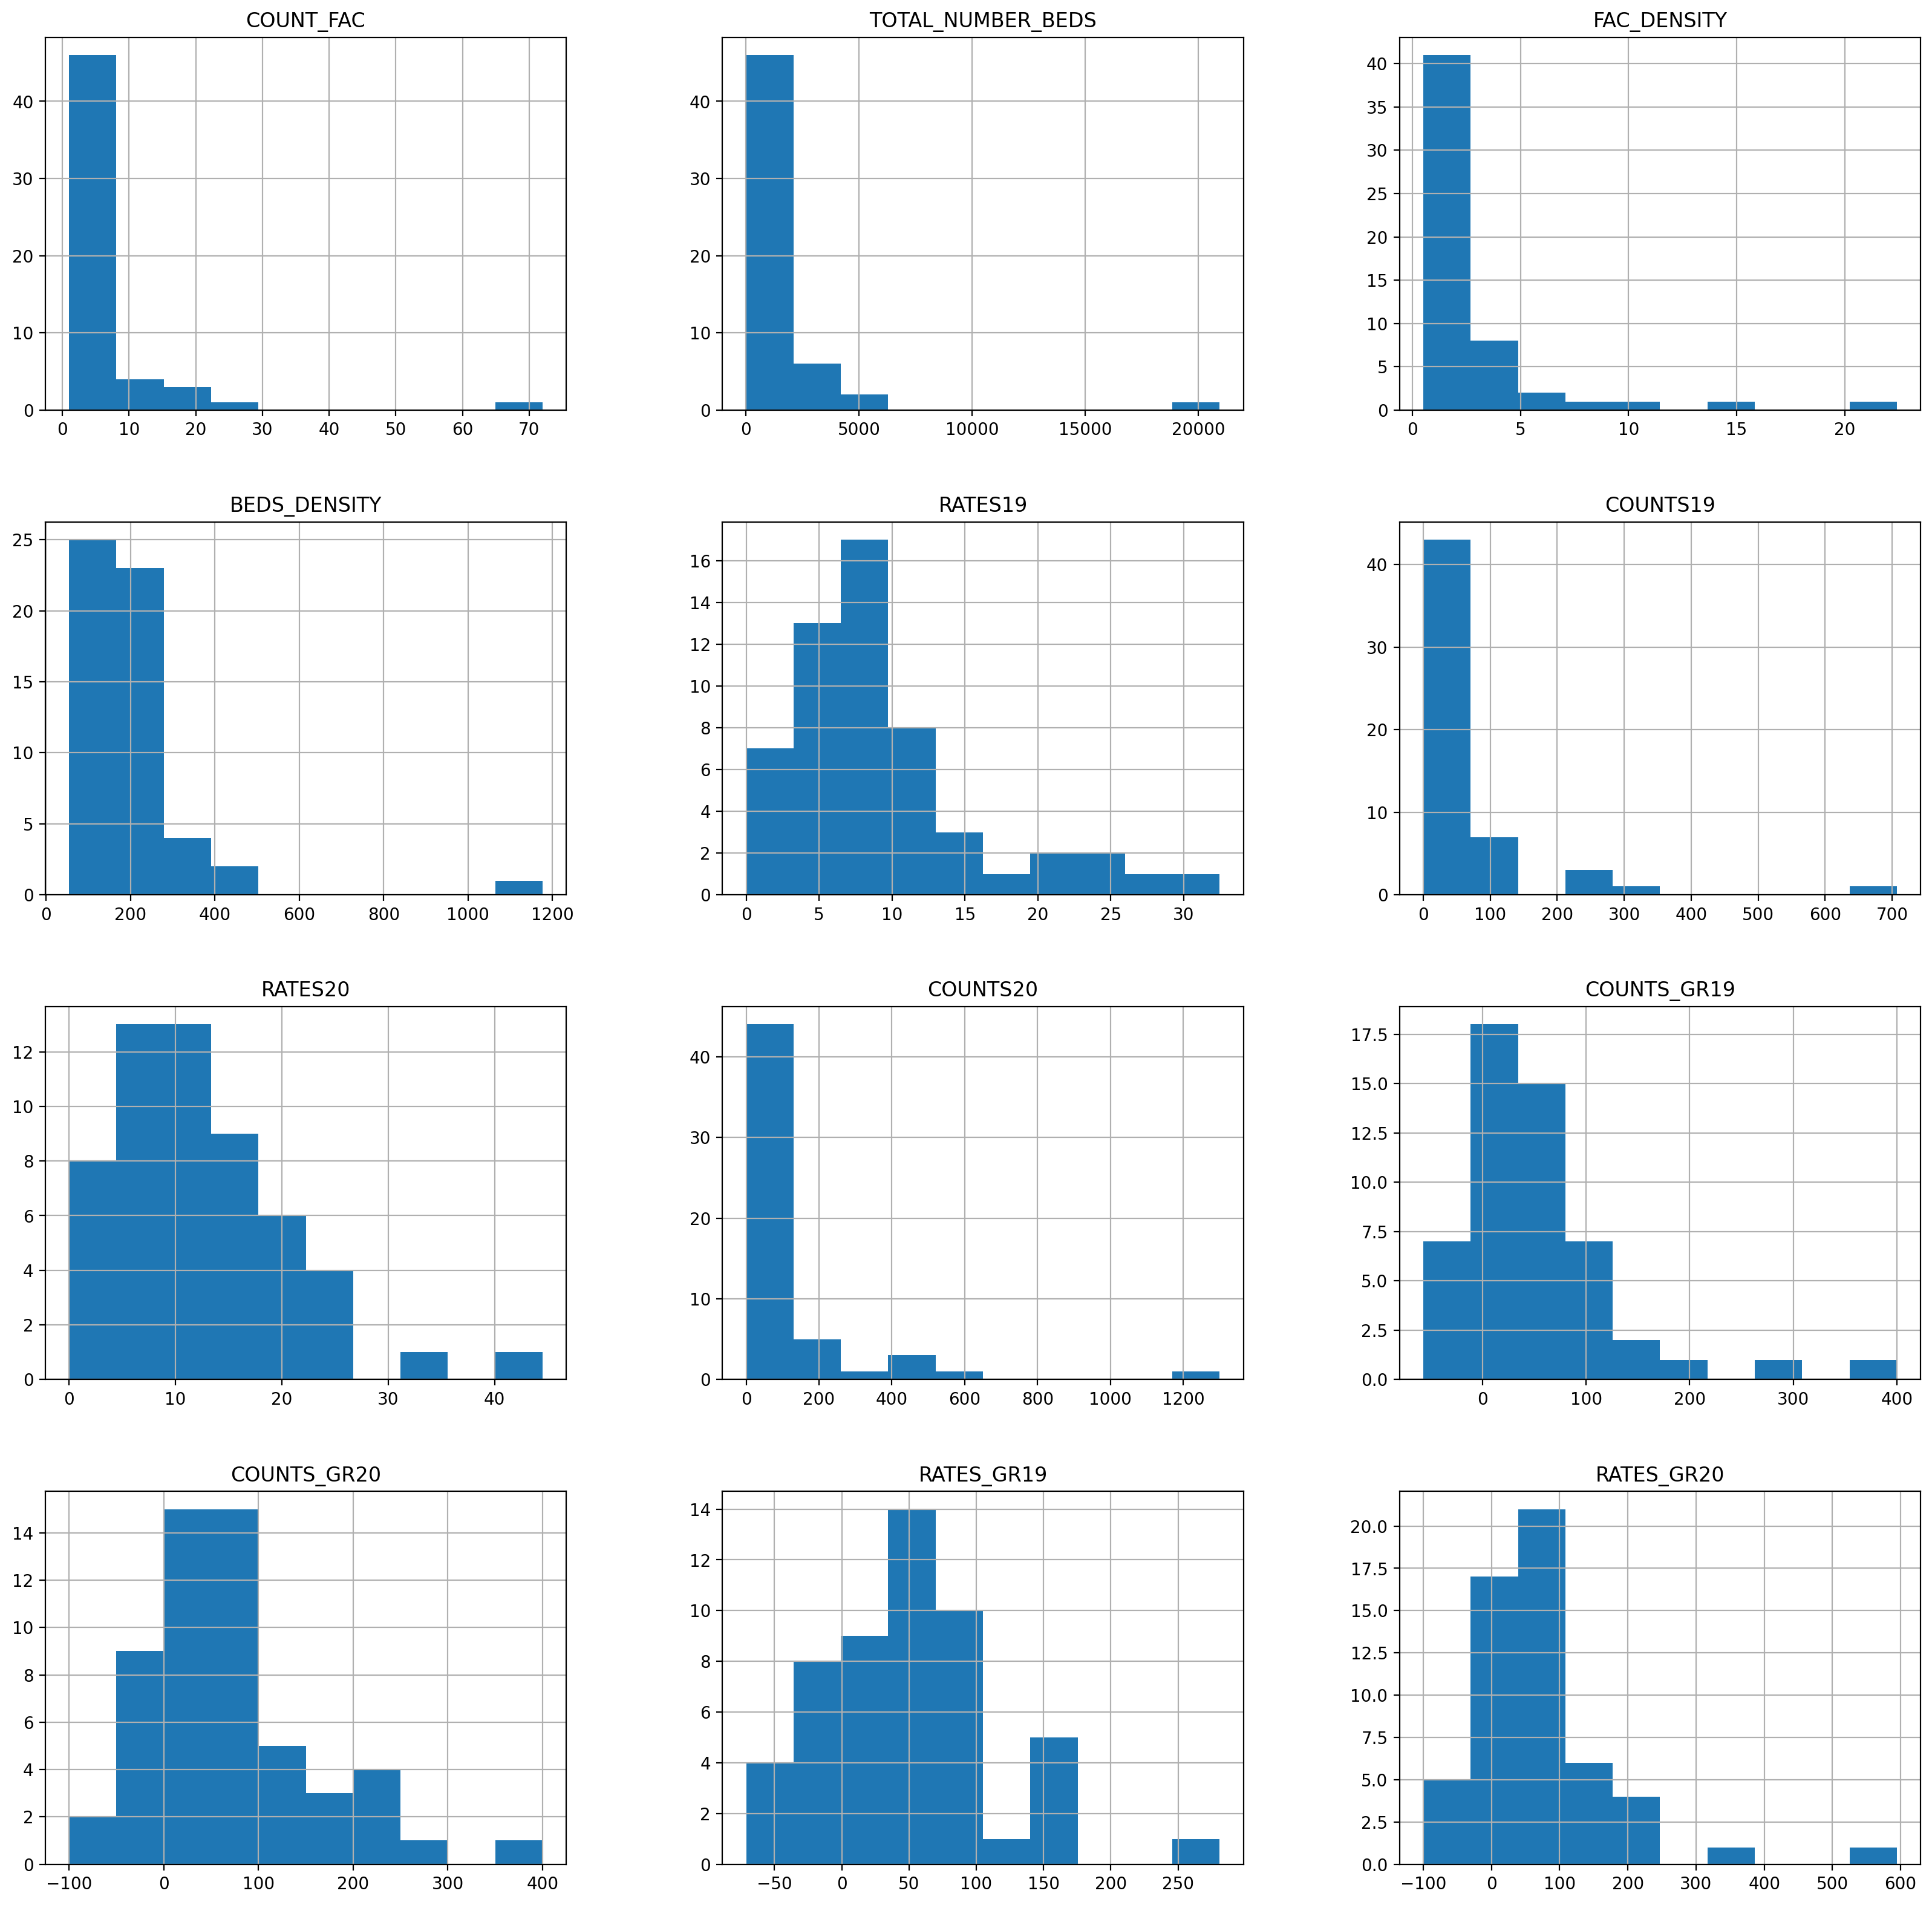

In [310]:
# Check statistical distributions of variables
hist = county_sum.hist(bins=10, figsize=(20,20))

There are outliers or bad data integrity in facility density or bed density. Let's check them out.

In [290]:
county_sum[county_sum["FAC_DENSITY"]>20]

,COUNTY_NAME,COUNT_FAC,TOTAL_NUMBER_BEDS,FAC_DENSITY,BEDS_DENSITY,RATES20,COUNTS20,COUNTS_GR19,COUNTS_GR20,RATES_GR19,RATES_GR20
36,Modoc,2,105,22.413986,1176.734282,0.0,0.0,0.0,0.0,0.0,0.0


In [291]:
county_sum[county_sum["BEDS_DENSITY"]>1000]

,COUNTY_NAME,COUNT_FAC,TOTAL_NUMBER_BEDS,FAC_DENSITY,BEDS_DENSITY,RATES20,COUNTS20,COUNTS_GR19,COUNTS_GR20,RATES_GR19,RATES_GR20
36,Modoc,2,105,22.413986,1176.734282,0.0,0.0,0.0,0.0,0.0,0.0


It seems like Modoc County has very high facility density and beds density. When searching about Modoc County, it is California's third-least populous county. Much of it is federal land (national forest, BLM, national park) [(Wiki)](https://en.wikipedia.org/wiki/Modoc_County,_California). For visualization purpose, we'd take it out when visualizing numbers on the map.

### Geomapping emergency care facility data

For this, we need shapefile of California County, which is acquired from [opendatasoft](https://public.opendatasoft.com/explore/dataset/us-county-boundaries/export/?disjunctive.statefp&disjunctive.countyfp&disjunctive.name&disjunctive.namelsad&disjunctive.stusab&disjunctive.state_name&refine.stusab=CA).

In [155]:
# Import library and load shapefile
import geopandas as gpd
map_df = gpd.read_file("data/us-county-boundaries/us-county-boundaries.shp")

map_df.head()

,statefp,countyfp,countyns,geoid,name,namelsad,stusab,lsad,classfp,mtfcc,...,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,state_name,countyfp_no,geometry
0,06,031,00277280,06031,Kings,Kings County,CA,06,H1,G4020,...,25260,None,A,3.600884e+09,3162664.0,+36.0724780,-119.8155301,California,31,"POLYGON ((-119.95892 36.25547, -119.95893 36.2..."
1,06,069,00277299,06069,San Benito,San Benito County,CA,06,H1,G4020,...,41940,None,A,3.596591e+09,4719300.0,+36.6116507,-121.0858108,California,69,"POLYGON ((-121.48300 36.76505, -121.48351 36.7..."
2,06,019,00277274,06019,Fresno,Fresno County,CA,06,H1,G4020,...,23420,None,A,1.543214e+10,136609898.0,+36.7610058,-119.6550193,California,19,"POLYGON ((-120.42219 36.84014, -120.42172 36.8..."
3,06,063,00277296,06063,Plumas,Plumas County,CA,06,H1,G4020,...,None,None,A,6.612401e+09,156387636.0,+39.9922953,-120.8243709,California,63,"POLYGON ((-121.36701 40.07767, -121.36688 40.0..."
4,06,027,01804637,06027,Inyo,Inyo County,CA,06,H1,G4020,...,None,None,A,2.641068e+10,76915743.0,+36.5619770,-117.4039269,California,27,"POLYGON ((-118.33758 36.65480, -118.33773 36.6..."


<AxesSubplot:>

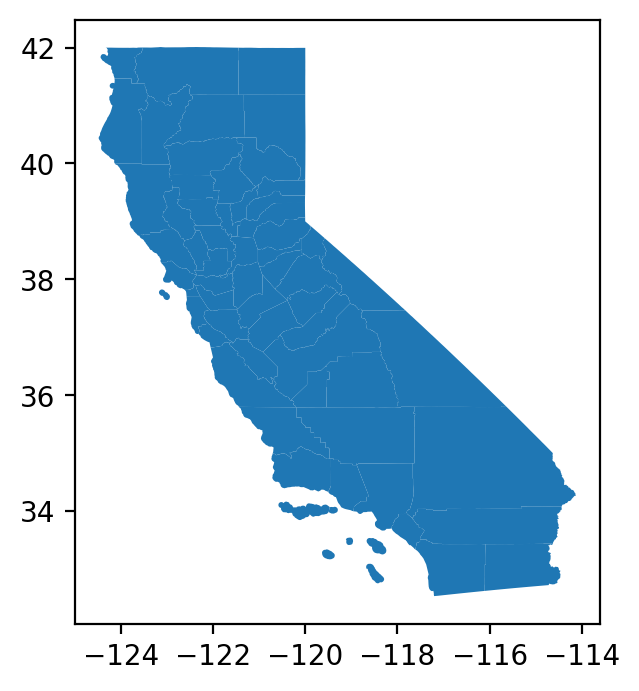

In [156]:
# Check if map works fine
map_df.plot()

In [292]:
# Merge geodata with hospital facility data
merged_map = map_df.set_index('name').join(county_sum.set_index("COUNTY_NAME"))
merged_map.head()

,statefp,countyfp,countyns,geoid,namelsad,stusab,lsad,classfp,mtfcc,csafp,...,COUNT_FAC,TOTAL_NUMBER_BEDS,FAC_DENSITY,BEDS_DENSITY,RATES20,COUNTS20,COUNTS_GR19,COUNTS_GR20,RATES_GR19,RATES_GR20
name,,,,,,,,,,,,,,,,,,,,,
Kings,06,031,00277280,06031,Kings County,CA,06,H1,G4020,260,...,1.0,173.0,0.640796,110.857641,7.36,10.0,-50.000000,400.000000,-61.594203,594.339623
San Benito,06,069,00277299,06069,San Benito County,CA,06,H1,G4020,488,...,1.0,82.0,1.526951,125.209956,6.33,4.0,150.000000,-20.000000,147.826087,-20.676692
Fresno,06,019,00277274,06019,Fresno County,CA,06,H1,G4020,260,...,7.0,1732.0,0.690744,170.909809,7.01,71.0,37.142857,47.916667,38.068182,44.238683
Plumas,06,063,00277296,06063,Plumas County,CA,06,H1,G4020,None,...,3.0,78.0,15.840329,411.848566,6.28,1.0,0.000000,-50.000000,-35.008283,-46.644010
Inyo,06,027,01804637,06027,Inyo County,CA,06,H1,G4020,None,...,2.0,62.0,10.973937,340.192044,22.03,3.0,-33.333333,50.000000,-18.570625,52.246026


In [293]:
# Remove Modoc when visualizing
merged_map = merged_map.reset_index()
merged_map_viz = merged_map[merged_map["name"] != "Modoc"]

In [294]:
merged_map_viz = merged_map_viz.set_index("name")

In [300]:
merged_map_viz["BEDS_DENSITY"].min()

53.97353138021114

In [301]:
# Create a function to map the variable
def california_map(variable,maptitle):
    vmin = merged_map_viz[variable].min()
    vmax = merged_map_viz[variable].max()
    fig, ax = plt.subplots(1, figsize=(10,6))
    merged_map_viz.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
    ax.axis('off')
    ax.set_title(maptitle)

    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    # empty array for the data range
    sm._A = []
    
    # add the colorbar to the figure
    cbar = fig.colorbar(sm)

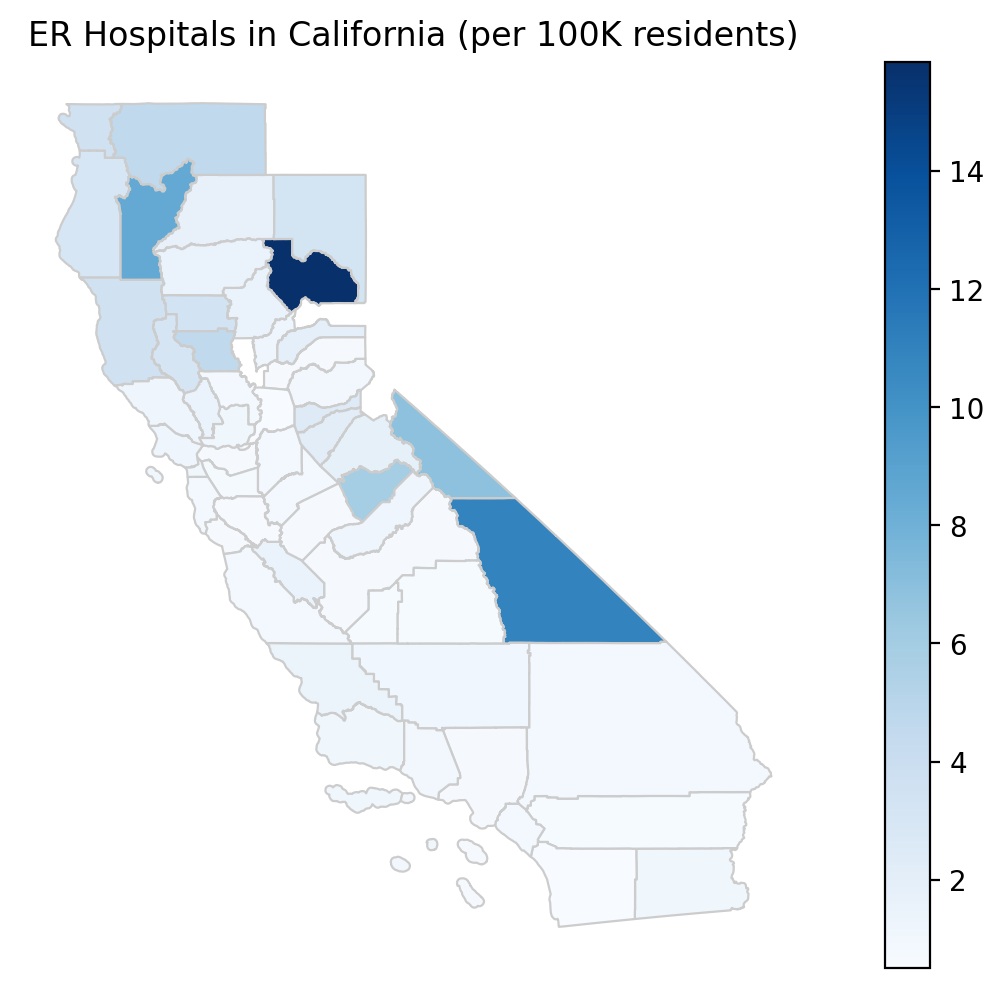

In [302]:
california_map('FAC_DENSITY','ER Hospitals in California (per 100K residents)')

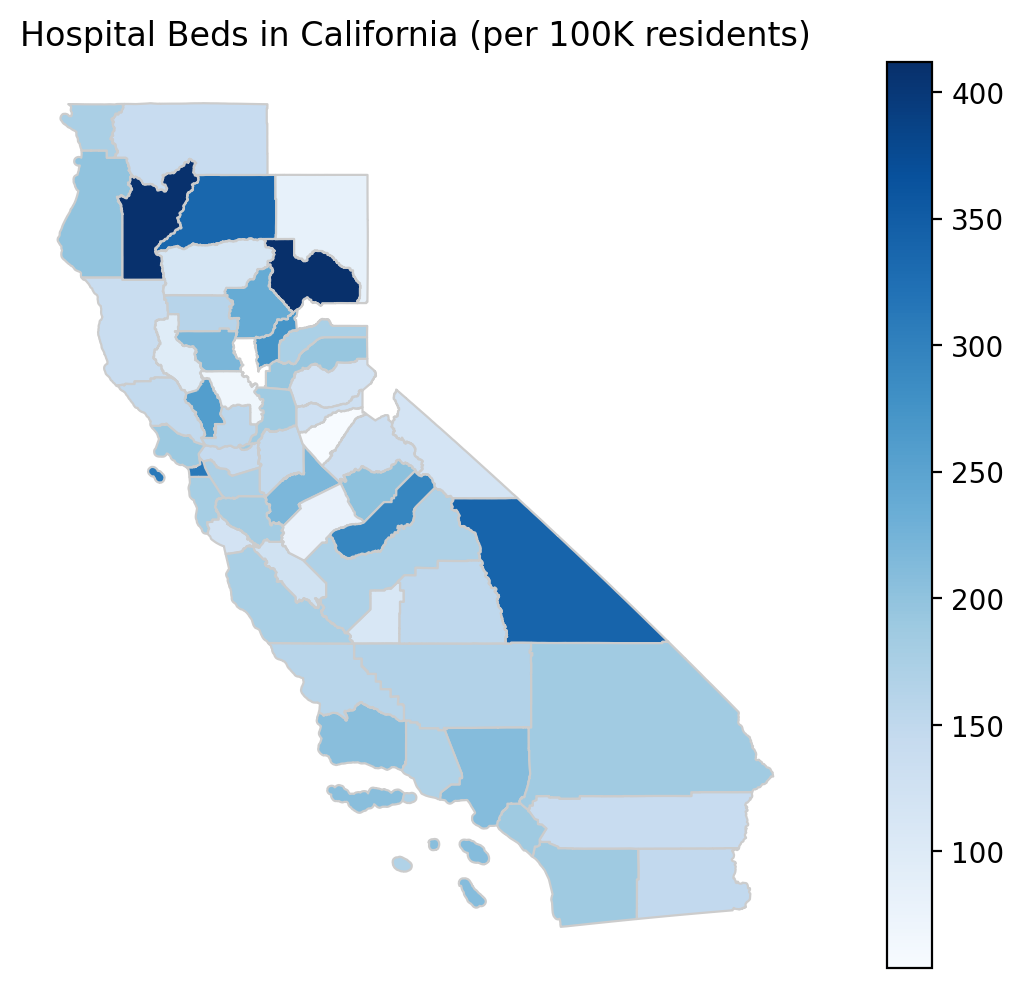

In [303]:
california_map('BEDS_DENSITY','Hospital Beds in California (per 100K residents)')

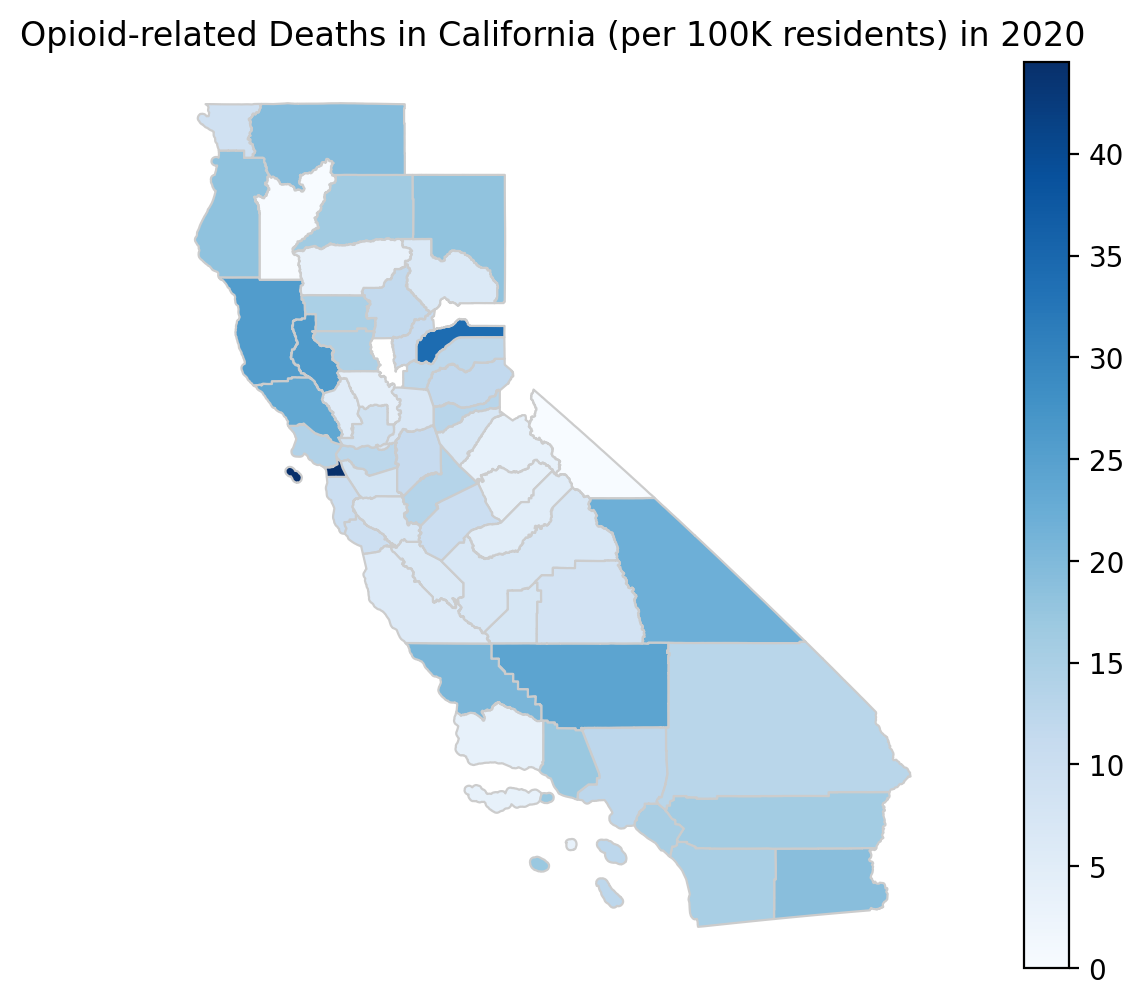

In [305]:
california_map('RATES20','Opioid-related Deaths in California (per 100K residents) in 2020')

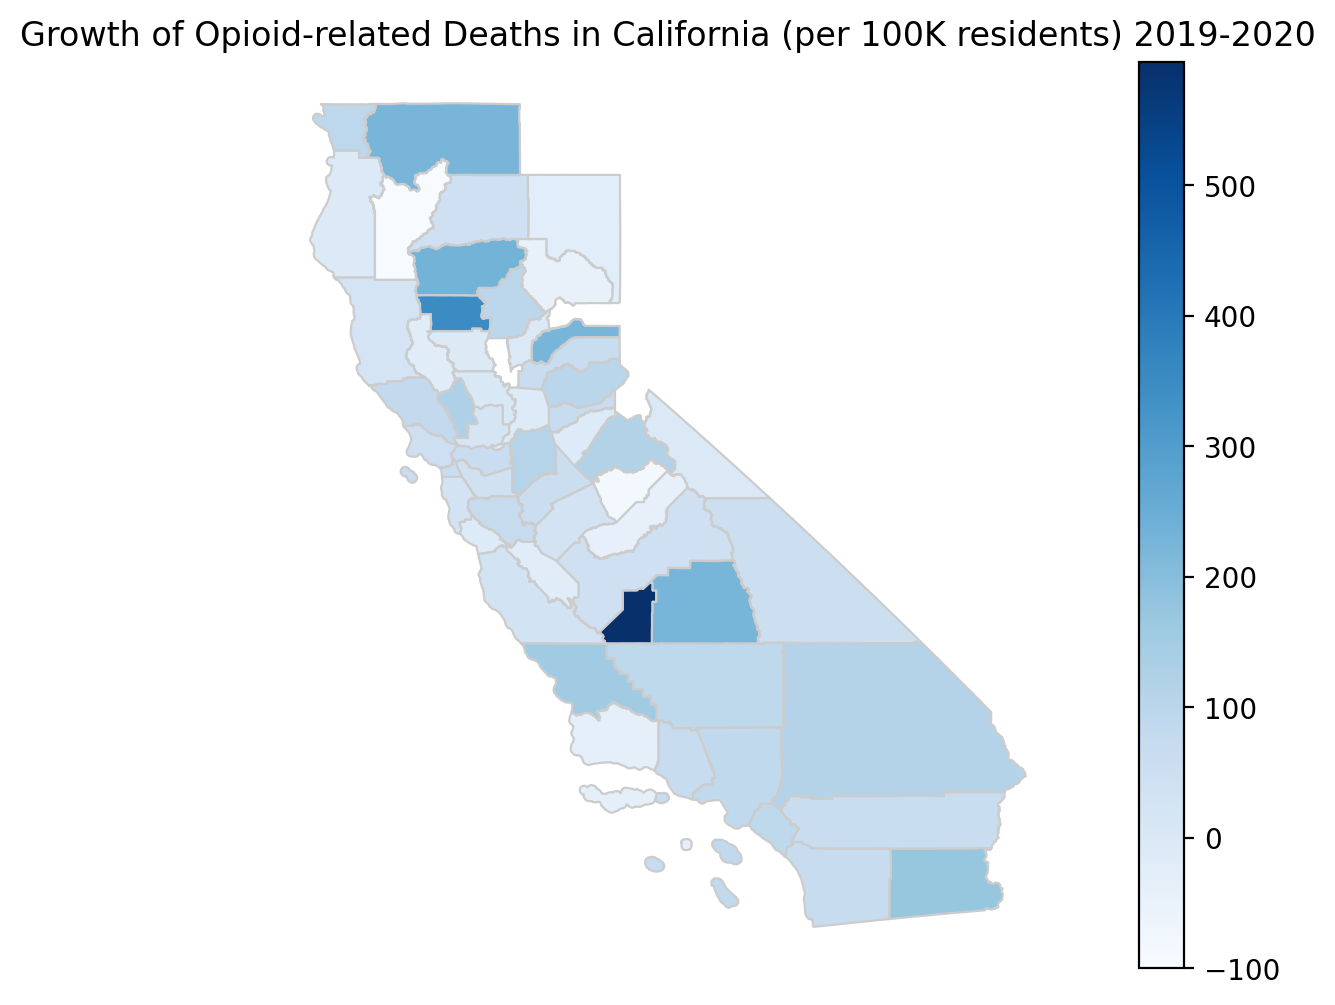

In [306]:
california_map('RATES_GR20','Growth of Opioid-related Deaths in California (per 100K residents) 2019-2020')

### Summary
So far, we've explored healthcare facility data by counties in California and visualized the distribution of ER facility and hospital bed availability in each county. Unfortunately, counties with high population such as Los Angeles, Sacramento, Riverside, San Bernando don't have higher number of ER facility and hospital beds per 100K residents.